<a href="https://colab.research.google.com/github/navila96/asdasdnasnjbfj/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 75.06/95.58 Organización de Datos
# Primer Cuatrimestre de 2020
# Trabajo Práctico 1: Enunciado


El trabajo práctico 1 de la materia se basa en el análisis de los tweets del set de datos de la competencia: https://www.kaggle.com/c/nlp-getting-started.  

* `id` - identificador unico para cada  tweet

* `text` - el texto del tweet

* `location` - ubicación desde donde fue enviado (podría no estar)

* `keyword` - un keyword para el tweet  (podría faltar)

* `target` - en train.csv, indica si se trata de un desastre real  (1) o no (0)





El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosas pueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no, ambas son de interés.

Los requisitos de la primera entrega son los siguientes:

* El análisis debe estar hecho en Python Pandas o R.

* El análisis debe entregarse en formato pdf vía gradescope. En el informe no va código.

* Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.


La evaluación del TP se realizará en base al siguiente criterio:

* Originalidad del análisis exploratorio. 

* Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 

* Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 

* Calidad de las visualizaciones presentadas.
 * ¿Tienen todos los ejes su rótulo?
 * ¿Tiene cada visualización un título?
 * ¿Es entendible la visualización sin tener que leer la explicación?
 * ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
 * ¿Es una visualización interesante?
 * ¿El uso del color es adecuado?
 * ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
 * ¿La visualización es consistente con los datos?
 * Conclusiones presentadas.
 * ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? 


# Resolución de Trabajo Práctico

## Instalación

In [0]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

openjdk-8-jdk-headless is already the newest version (8u252-b09-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


## Comienzo de Análisis

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [0]:
#id='13LZQbAQVwkJ4V1d6EZWnAS_STsxP32Wk'
#downloaded = drive.CreateFile({'id': id})
#downloaded.GetContentFile('train.csv')

In [0]:
# Load the Data and take a quick look.
url = 'https://raw.githubusercontent.com/navila96/asdasdnasnjbfj/master/train.csv'
train = pd.read_csv(url, encoding='latin-1')
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


### *Análisis Keyword vs. Target*

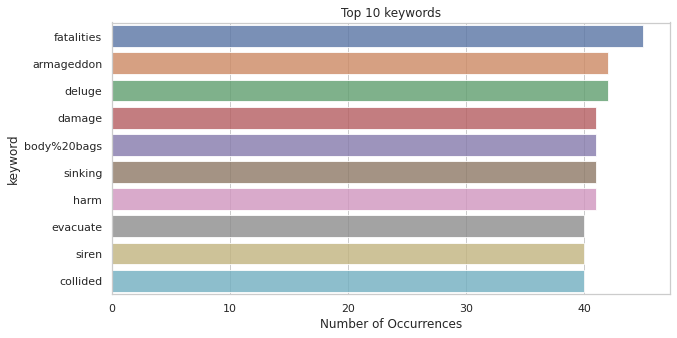

In [55]:
accident_count  = train['keyword'].value_counts()
accident_count = accident_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(accident_count.values, accident_count.index, alpha=0.8)
plt.title('Top 10 keywords')
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('keyword', fontsize=12)
plt.show()


In [0]:
train['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [0]:
(train['keyword'].value_counts()).describe()

count    221.000000
mean      34.171946
std        4.786091
min        9.000000
25%       33.000000
50%       35.000000
75%       37.000000
max       45.000000
Name: keyword, dtype: float64

In [0]:
grouped = train.groupby(['keyword']).agg({'target':['count', 'min', 'mean', 'max']})
grouped

target                  
                     count min      mean max
keyword                                     
ablaze                  36   0  0.361111   1
accident                35   0  0.685714   1
aftershock              34   0  0.000000   0
airplane%20accident     35   0  0.857143   1
ambulance               38   0  0.526316   1
...                    ...  ..       ...  ..
wounded                 37   0  0.702703   1
wounds                  33   0  0.303030   1
wreck                   37   0  0.189189   1
wreckage                39   1  1.000000   1
wrecked                 39   0  0.076923   1

[221 rows x 4 columns]

In [0]:
grouped.loc[grouped[('target','mean')]>0.5,:].sort_values(('target','count'),ascending=False)

target                  
                       count min      mean max
keyword                                       
fatalities                45   0  0.577778   1
evacuate                  40   0  0.625000   1
outbreak                  40   0  0.975000   1
collided                  40   0  0.575000   1
wreckage                  39   1  1.000000   1
...                      ...  ..       ...  ..
bombing                   29   0  0.931034   1
volcano                   27   0  0.666667   1
bush%20fires              25   0  0.720000   1
forest%20fire             19   0  0.789474   1
radiation%20emergency      9   0  0.555556   1

[86 rows x 4 columns]

### *Otro Análisis*

In [0]:
train['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [0]:
train['location'].value_counts() > 20

USA                            True
New York                       True
United States                  True
London                         True
Canada                         True
                              ...  
Mysore, Karnataka             False
Jonesboro, AR MO, IOWA USA    False
The Peach State               False
am everywhere                 False
Bangalore, INDIA              False
Name: location, Length: 3341, dtype: bool